 ### Importing libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv(r"C:\Users\Abhishrut\Downloads\startup_funding 2.csv")
df

Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler products   
3                 FinTech                      Online Investment   
4     Fashion and Apparel            Embroiled Clothes For Women   
...                   ...                                    ...   
3039                  NaN                                    NaN   
3040                  NaN                                    NaN   
3041                  NaN                                    NaN   
3042                  NaN                                    NaN   
3043                  NaN                                    NaN   

     City  Location                     Investors Name       InvestmentnType  \
0         Bengaluru            Tiger Global Management  Private Equity Round   
1           Gurgaon          Susquehanna Growth Equity              Series C   
2         Bengaluru              Sequoia Capital India              Series B   
3         New Delhi                     Vinod Khatumal          Pre-series A   
4            Mumbai            Sprout Venture Partners            Seed Round   
...             ...                                ...                   ...   
3039            NaN        Asia Pacific Internet Group        Private Equity   
3040            NaN                     KARSEMVEN Fund        Private Equity   
3041            NaN     Exfinity Fund, GrowX Ventures.        Private Equity   
3042            NaN                         MakeMyTrip        Private Equity   
3043            NaN  UK based Group of Angel Investors          Seed Funding   

     Amount in USD                            Remarks  
0     20,00,00,000                                NaN  
1        80,48,394                                NaN  
2      1,83,58,860                                NaN  
3        30,00,000                                NaN  
4        18,00,000                                NaN  
...            ...                                ...  
3039     45,00,000                                NaN  
3040      8,25,000                Govt backed VC Fund  
3041     15,00,000                                NaN  
3042           NaN  Strategic Funding, Minority stake  
3043      1,40,000                                NaN  

[3044 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


#### Check the null values 

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [7]:
## Set 'Sr No' as default index

In [8]:
df.set_index('Sr No',inplace = True)

In [9]:
df.head()

Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
Sr No                                                                      
1          09/01/2020                        BYJU’S               E-Tech   
2          13/01/2020                        Shuttl       Transportation   
3          09/01/2020                     Mamaearth           E-commerce   
4          02/01/2020  https://www.wealthbucket.in/              FinTech   
5          02/01/2020                        Fashor  Fashion and Apparel   

                                 SubVertical City  Location  \
Sr No                                                         
1                                 E-learning      Bengaluru   
2                  App based shuttle service        Gurgaon   
3      Retailer of baby and toddler products      Bengaluru   
4                          Online Investment      New Delhi   
5                Embroiled Clothes For Women         Mumbai   

                  Investors Name       InvestmentnType Amount in USD Remarks  
Sr No                                                                         
1        Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
2      Susquehanna Growth Equity              Series C     80,48,394     NaN  
3          Sequoia Capital India              Series B   1,83,58,860     NaN  
4                 Vinod Khatumal          Pre-series A     30,00,000     NaN  
5        Sprout Venture Partners            Seed Round     18,00,000     NaN

#### Drop unwanted column

In [10]:
df.drop(columns = 'Remarks',inplace = True)

In [11]:
df.head()

Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
Sr No                                                                      
1          09/01/2020                        BYJU’S               E-Tech   
2          13/01/2020                        Shuttl       Transportation   
3          09/01/2020                     Mamaearth           E-commerce   
4          02/01/2020  https://www.wealthbucket.in/              FinTech   
5          02/01/2020                        Fashor  Fashion and Apparel   

                                 SubVertical City  Location  \
Sr No                                                         
1                                 E-learning      Bengaluru   
2                  App based shuttle service        Gurgaon   
3      Retailer of baby and toddler products      Bengaluru   
4                          Online Investment      New Delhi   
5                Embroiled Clothes For Women         Mumbai   

                  Investors Name       InvestmentnType Amount in USD  
Sr No                                                                 
1        Tiger Global Management  Private Equity Round  20,00,00,000  
2      Susquehanna Growth Equity              Series C     80,48,394  
3          Sequoia Capital India              Series B   1,83,58,860  
4                 Vinod Khatumal          Pre-series A     30,00,000  
5        Sprout Venture Partners            Seed Round     18,00,000

#### Renaming column

In [12]:
df.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [13]:
df.rename(columns = {'Date dd/mm/yyyy':'Date',
                     'Startup Name':'Startup',
                     'Industry Vertical':'Vertical',
                     'City  Location':'City',
                     'Investors Name':'Investors',
                     'InvestmentnType':'Investment Round',
                     'Amount in USD':'Amount in INR'},
                    inplace = True)

In [14]:
df.head()

Date                       Startup             Vertical  \
Sr No                                                                  
1      09/01/2020                        BYJU’S               E-Tech   
2      13/01/2020                        Shuttl       Transportation   
3      09/01/2020                     Mamaearth           E-commerce   
4      02/01/2020  https://www.wealthbucket.in/              FinTech   
5      02/01/2020                        Fashor  Fashion and Apparel   

                                 SubVertical       City  \
Sr No                                                     
1                                 E-learning  Bengaluru   
2                  App based shuttle service    Gurgaon   
3      Retailer of baby and toddler products  Bengaluru   
4                          Online Investment  New Delhi   
5                Embroiled Clothes For Women     Mumbai   

                       Investors      Investment Round Amount in INR  
Sr No                                                                 
1        Tiger Global Management  Private Equity Round  20,00,00,000  
2      Susquehanna Growth Equity              Series C     80,48,394  
3          Sequoia Capital India              Series B   1,83,58,860  
4                 Vinod Khatumal          Pre-series A     30,00,000  
5        Sprout Venture Partners            Seed Round     18,00,000

## Data Cleaning

In [15]:
df['Amount in INR'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [16]:
## Replace NaN values with 0
df['Amount in INR'] = df['Amount in INR'].fillna(0)

## Replace commas with space
df['Amount in INR'] = df['Amount in INR'].str.replace(',','',regex = False)

##  Replace unwanted strings with '0'
df['Amount in INR'] = df['Amount in INR'].replace(['undisclosed', 'unknown', 'Undisclosed', '\\xc2\\xa0N/A', 'nan'],'0')

## Replace 'N/A' with 0
df['Amount in INR'] = df['Amount in INR'].str.replace('N/A','0')

## Replace encoding issue with space 
df['Amount in INR'] = df['Amount in INR'].str.replace(r'^\\\\xc2\\\\xa0', '', regex=True)
df['Amount in INR'] = df['Amount in INR'].str.rstrip('+')

## Change the column data type from object to float
df['Amount in INR'] = df['Amount in INR'].astype(float)


In [17]:
## Converting amount from dollar to rupees
df['Amount in INR'] = ((df['Amount in INR']*86.60/10000000).round(2))

In [18]:
df.head()

Date                       Startup             Vertical  \
Sr No                                                                  
1      09/01/2020                        BYJU’S               E-Tech   
2      13/01/2020                        Shuttl       Transportation   
3      09/01/2020                     Mamaearth           E-commerce   
4      02/01/2020  https://www.wealthbucket.in/              FinTech   
5      02/01/2020                        Fashor  Fashion and Apparel   

                                 SubVertical       City  \
Sr No                                                     
1                                 E-learning  Bengaluru   
2                  App based shuttle service    Gurgaon   
3      Retailer of baby and toddler products  Bengaluru   
4                          Online Investment  New Delhi   
5                Embroiled Clothes For Women     Mumbai   

                       Investors      Investment Round  Amount in INR  
Sr No                                                                  
1        Tiger Global Management  Private Equity Round        1732.00  
2      Susquehanna Growth Equity              Series C          69.70  
3          Sequoia Capital India              Series B         158.99  
4                 Vinod Khatumal          Pre-series A          25.98  
5        Sprout Venture Partners            Seed Round          15.59

In [19]:
df.rename(columns = {'Amount in INR':'Amount in INR(cr)'},inplace = True)

In [20]:
df.head()

Date                       Startup             Vertical  \
Sr No                                                                  
1      09/01/2020                        BYJU’S               E-Tech   
2      13/01/2020                        Shuttl       Transportation   
3      09/01/2020                     Mamaearth           E-commerce   
4      02/01/2020  https://www.wealthbucket.in/              FinTech   
5      02/01/2020                        Fashor  Fashion and Apparel   

                                 SubVertical       City  \
Sr No                                                     
1                                 E-learning  Bengaluru   
2                  App based shuttle service    Gurgaon   
3      Retailer of baby and toddler products  Bengaluru   
4                          Online Investment  New Delhi   
5                Embroiled Clothes For Women     Mumbai   

                       Investors      Investment Round  Amount in INR(cr)  
Sr No                                                                      
1        Tiger Global Management  Private Equity Round            1732.00  
2      Susquehanna Growth Equity              Series C              69.70  
3          Sequoia Capital India              Series B             158.99  
4                 Vinod Khatumal          Pre-series A              25.98  
5        Sprout Venture Partners            Seed Round              15.59

#### Find the invalid dates from the date column

In [21]:
invalid_dates = df[~pd.to_datetime(df['Date'],dayfirst = True, errors ='coerce').notnull()]
invalid_dates['Date']

Sr No
193               05/072018
2572              01/07/015
2607    \\xc2\\xa010/7/2015
2776             12/05.2015
2777             12/05.2015
2832             13/04.2015
3012             15/01.2015
3030            22/01//2015
Name: Date, dtype: object

##### Replace those invalid dates

In [22]:


df['Date'] = df['Date'].replace({
    '05/072018':'05/07/2018',
    '01/07/015':'01/07/2015',
    r'\\xc2\\xa010/7/2015':'10/07/2015',
    '22/01//2015':'22/01/2015'})

##### Convert Date column to datetime

In [23]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True , errors = 'coerce')

In [24]:
## Replace Null Values from vertical,subvertical, investor,investmentround
# Replace null values in the specified columns
df['Vertical'] = df['Vertical'].fillna('Others')

df['SubVertical'] = df['SubVertical'].fillna('Unknown')

df['Investors'] = df['Investors'].fillna('Undisclosed')

df['Investment Round'] = df['Investment Round'].fillna('Undisclosed')


#### Identify the Encoding issue from the Vertical column

In [25]:
vertical_encoding_issue = r'[^a-zA-Z0-9\s.,&()-]'
vertical_encoding_issue = df[df['Vertical'].str.contains(vertical_encoding_issue,regex= True,na= False)]

In [26]:
vertical_encoding_issue['Vertical']

Sr No
2176        Hyperlocal\\xc2\\xa0 Grocery Delivery Service
2201    WiFi \xe2\x80\x93 first Cloud communication pl...
2221                     Mobile Growth Hacking\\nPlatform
2239       Women Ethnic Wear\\xc2\\xa0 Online Marketplace
2365    Location based Nightlife recommendation\\xc2\\...
2386             Luxury goods\\xc2\\xa0 Shopping Platform
2395    ECommerce Brands\\xe2\\x80\\x99 Full Service A...
2397                 Community Driven News/Views Platform
2410                Home Design & D\\xc3\\xa9cor platform
2420           Chain of Tea Caf\\xc3\\xa9\\xe2\\x80\\x99s
2489              App security\\xc2\\xa0 testing platform
2509               Home Design & D\\xc3\\xa9cor solutions
2571                             CRM / Analytics platform
2603                 \\xc2\\xa0News Aggregator mobile app
2604                     \\xc2\\xa0Online Jewellery Store
2605                \\xc2\\xa0Fashion Info Aggregator App
2606             \\xc2\\xa0Online Study Notes Marketplace
2607    

In [27]:
## Fix the encoding issue from the vertical column
def Fix_encoding(names):
    ## Replace Unwanted characters
    names = re.sub(r'[^a-zA-Z0-9\s.,&()-]','',names)

    ## Replace / with 'And'
    names = names.replace('/','and')

    ## Normalize the spaces
    names = re.sub(r'\s+',' ',names).strip()

    ## converting it to title for consistency
    names = names.title()

    return names

## Applying the function to Vertical column
df['Vertical'] = df['Vertical'].apply(Fix_encoding)
    

In [28]:
df['Vertical'] = df['Vertical'].str.replace(r'Xc2Xa0','',regex = True)

In [29]:
df['Vertical'] = df['Vertical'].str.replace(r'[Xx][a-zA-Z0-9]{2,}','',regex = True)

In [30]:
df['Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-Commerce', 'Fintech',
       'Fashion And Apparel', 'Logistics', 'Hospitality', 'Technology',
       'Aerospace', 'B2B-Focused Foodtech Startup', 'Finance', 'Video',
       'Gaming', 'Software', 'Health And Wellness', 'Education',
       'Food And Beverage', 'B2B Marketing', 'Video Games', 'Saas',
       'Last Mile Transportation', 'Healthcare', 'Customer Service',
       'B2B', 'Consumer Goods', 'Advertising, Marketing', 'Iot',
       'Information Technology', 'Consumer Technology', 'Accounting',
       'Retail', 'Customer Service Platform', 'Automotive', 'Edtech',
       'Services', 'Compliance', 'Transport', 'Artificial Intelligence',
       'Tech', 'Health Care', 'Lu Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media',
       'Automobile', 'Agtech', 'Social Media', 'Ai', 'Ecommerce',
       'Nanotechnology', 'Services Platform', 'Travel Tech',
       'Online Education', 'Online Marketplace', 'Saas, E

### Clean City column

In [31]:
df['City'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [32]:
df['City'] = df['City'].str.replace(r'\\\\xc2\\\\xa0','',regex = True)

df['City'] = df['City'].replace('nan','Undisclosed')

df['City'] = df['City'].fillna('Undisclosed')

In [33]:
# Replace values in 'City' column using dictionary mapping
df['City'] = df['City'].replace({
    'Bengaluru': 'Bangalore',
    "Bengaluru'":'Bangalore',
    'Mumbai/Bengaluru': 'Bangalore',
    'Karnataka': 'Bangalore',
    'New York/ India': 'Bangalore',
    'Bangalore / USA': 'Bangalore',
    'Boston': 'Bangalore',
    'Bangalore / Palo Alto': 'Bangalore',
    'Kormangala': 'Koramangala',
    'Palo Alto': 'Chennai',
    'Andheri': 'Mumbai',
    'Chembur': 'Mumbai',
    'India': 'Mumbai',
    'Uttar Pradesh': 'Mumbai',
    'US/India': 'Mumbai',
    'Mumbai / NY': 'Mumbai',
    'Ahemadabad': 'Ahmedabad',
    'Ahemdabad':'Ahmedabad',
    'Bhubneswar': 'Bhubaneswar',
    'Kolkatta': 'Kolkata',
    'Nw Delhi': 'Delhi',
    'Hubli': 'Hubballi',
    'Kerala': 'Thiruvananthapuram',
    'Goa/Hyderabad': 'Verna',
    'Belgaum': 'Belagavi',
    'Pune / Singapore': 'Pune',
    'Pune/Seattle': 'Pune',
    'Mumbai / Global': 'Trivandrum',
    'US': 'Bangalore',
    'Hyderabad/USA': 'Hyderabad',
    'Noida / Singapore': 'Undisclosed',
    'USA': 'Undisclosed',
    'Bangalore/ Bangkok': 'Undisclosed',
    'Seattle / Bangalore': 'Undisclosed',
    'New Delhi/ Houston': 'Undisclosed',
    'India / US': 'Gurgaon',
    'Gurgaon / SFO': 'Gurgaon',
    'Bengaluru and Gurugram': 'Gurgaon',
    'Gurugram': 'Gurgaon',
    'New Delhi': 'Delhi'
})
##  retain only those companies that are started in India and have funding exclusively within India,

# Update specific rows by index
df.loc[2070, 'City'] = 'Pune'
df.loc[2256, 'City'] = 'Pune'
df.loc[63, 'City'] = 'Delhi'
df.loc[69, 'City'] = 'Noida'
df.loc[2293, 'City'] = 'Mumbai'

# Replace additional out-of-India cities with 'Out of India'
df['City'] = df['City'].replace([
    'San Jose', 'Menlo Park', 'Burnsville', 'Santa Monica', 'Nairobi', 'Singapore', 'New York',
    'India/USA', "'New York'", 'California', 'Delhi & Cambridge', 'Missourie', 'Mumbai / UK',
    'SFO / Bangalore', 'London', 'Pune / Dubai', 'Bangalore / SFO', 'USA/India', 'Pune / US',
    'Chennai/ Singapore', 'Bangalore / San Mateo', 'Dallas / Hyderabad', 'Singapore', 'Mumbai / NY',
    'New Delhi / US', 'New Delhi / California', 'San Francisco', 'India/Singapore', 'India/US', 'San Jose,',"'New York"
], 'Out of India')

In [34]:
df['City'].unique()

array(['Bangalore', 'Gurgaon', 'Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'Out of India', 'Amritsar', 'Koramangala',
       'Tulangan', 'Hyderabad', 'Taramani', 'Haryana', 'Bhopal', 'Jaipur',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Ahmedabad', 'Rourkela',
       'Srinagar', 'Bhubaneswar', 'Chandigarh', 'Kolkata', 'Coimbatore',
       'Udaipur', 'Undisclosed', 'Surat', 'Goa', 'Gaya', 'Vadodara',
       'Trivandrum', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Hubballi', 'Thiruvananthapuram', 'Kozhikode', 'Siliguri',
       'Lucknow', 'Kanpur', 'Varanasi', 'Jodhpur', 'Verna', 'Belagavi'],
      dtype=object)

In [35]:
## Fix the Investment Round column
# Replace values in 'Investment Round' column

df['Investment Round'] = df['Investment Round'].replace(
    ['Private\\\\nEquity', 'Private Equity Round', 'PrivateEquity', 'Private', 'Private Funding', 'Private\\nEquity'], 
    'Private Equity'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Debt-Funding', 'Debt'], 
    'Debt Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Venture', 'Venture - Series Unknown'], 
    'Venture Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Seed Funding Round', 'Seed funding', 'Seed\\\\nFunding'], 
    'Seed Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['pre-series A', 'pre-Series A', 'Pre Series A'], 
    'Pre-Series A'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Angel Funding', 'Angel'], 
    'Angel Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Seed/ Angel Funding', 'Seed / Angle Funding', 'Angel / Seed Funding'], 
    'Seed/Angel Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Equity', 'Equity Based Funding'], 
    'Equity Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    'Term Loa', 
    'Term Loan'
)

df['Investment Round'] = df['Investment Round'].replace(
    'Crowd funding', 
    'Crowd Funding'
)


In [36]:
list(df['Investors'].unique())

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Undisclosed',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'I

### Identify the Investor encoding issue

In [37]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
Investor_mistyped_names = df[df['Investors'].str.contains(pattern,regex = True, na = False)]
Investor_mistyped_names['Investors'].to_list()

['India Quotient and LetsVenture\\\\xe2\\\\x80\\\\x99s Angel Fund',
 'Sequoia India, Hillhouse Capital, Alphabet\\\\xe2\\\\x80\\\\x99s growth investment arm Capital G and Axis Bank',
 'Norwest Venture Partners, CDC Group, the UK\\\\xe2\\\\x80\\\\x99s Development Finance Institution and P Surendra Pai',
 'Lakestar and Jungle Ventures, Softbank\\\\xe2\\\\x80\\\\x99s DeepCore.',
 'DST Global and Lightspeed Venture Partners\\\\xe2\\\\x80\\\\x99 global fund.',
 'KDDI\\\\xc2\\\\xa0',
 'CLP Holdings Group, Innogy, \\\\xc3\\\\x98rstead, and Tenaska',
 'Vertex Ventures Southeast Asia (SEA) and India and Sistema Asia Fund, Fosun RZ Capital, Ventureast, and Endiya Partners.\\\\n\\\\n',
 'CDC Group plc\\\\xc2\\\\xa0',
 'Sunil Kant Munjal, Hero Electronix\\\\xe2\\\\x80\\\\x99s corporate financing arm, Electronic Development Fund',
 '"Kedaraa Capital, Ontario Teachers\\\\\'"',
 'Titan Co Ltd, Tata Group\\\\xe2\\\\x80\\\\x99s watch and jewellery retailing firm',
 'Factor[e] Ventures',
 'Undisclosed H

In [38]:
## Fix the encoding issue in Investors columns

In [39]:
def mistpyed_investor_names(names):
    if pd.isna(names): ## skips the NaN values 
        return names
    
    names = re.sub(r'[^a-zA-Z0-9\s.,&/\'()-]', '', names) ## decode the text
    
    names = re.sub(r'\s+',' ',names).strip()
    
    names = names.title()
    
    return names
df['Investors'] = df['Investors'].apply(mistpyed_investor_names)

In [40]:
df['Investors'].unique()

array(['Tiger Global Management', 'Susquehanna Growth Equity',
       'Sequoia Capital India', ..., 'Karsemven Fund',
       'Exfinity Fund, Growx Ventures.',
       'Uk Based Group Of Angel Investors'], dtype=object)

In [41]:
pd.set_option('display.max_rows', None)  # Show all rows in the DataFrame
print(df['Investors'])

Sr No
1                                 Tiger Global Management
2                               Susquehanna Growth Equity
3                                   Sequoia Capital India
4                                          Vinod Khatumal
5                                 Sprout Venture Partners
6                                       Chiratae Ventures
7                                           Ant Financial
8                             Sathguru Catalyzer Advisors
9                             Ping An Global Voyager Fund
10                         Mumbai Angels, Ravikanth Reddy
11           Saif Partners, Spring Canter Investment Ltd.
12                Paytm, Nptk, Sabre Partners And Neoplux
13                                     Vertex Growth Fund
14                                            Undisclosed
15                                    Ruizheng Investment
16             Manipal Education And Medical Group (Memg)
17                                   Softbank Vision Fund
18      

In [42]:
df['Investors'] = df['Investors'].str.replace(r'Xc2Xa0','',regex = True)

In [43]:
df['Investors'] = df['Investors'].str.replace(r'[Xx][a-zA-Z0-9]{2,}','',regex = True)

In [44]:
df.head()

Date                       Startup             Vertical  \
Sr No                                                                 
1     2020-01-09                        BYJU’S               E-Tech   
2     2020-01-13                        Shuttl       Transportation   
3     2020-01-09                     Mamaearth           E-Commerce   
4     2020-01-02  https://www.wealthbucket.in/              Fintech   
5     2020-01-02                        Fashor  Fashion And Apparel   

                                 SubVertical       City  \
Sr No                                                     
1                                 E-learning  Bangalore   
2                  App based shuttle service    Gurgaon   
3      Retailer of baby and toddler products  Bangalore   
4                          Online Investment      Delhi   
5                Embroiled Clothes For Women     Mumbai   

                       Investors Investment Round  Amount in INR(cr)  
Sr No                                                                 
1        Tiger Global Management   Private Equity            1732.00  
2      Susquehanna Growth Equity         Series C              69.70  
3          Sequoia Capital India         Series B             158.99  
4                 Vinod Khatumal     Pre-series A              25.98  
5        Sprout Venture Partners       Seed Round              15.59

### Fix Subvertical Column

In [45]:
patterns = r'[^a-zA-Z0-9\s.,&/\'()*+:-]'
patterns = df[df['SubVertical'].str.contains(patterns,regex= True,na =False)]

In [46]:
patterns['SubVertical'].unique()


array(['News and ebooks Mobile App\\\\xc2\\\\xa0',
       'Applied Artificial Intelligence and IoT focused\\\\xc2\\\\xa0Platform',
       '\\\\xc2\\\\xa0Customer Sourcing Platform\\\\xc2\\\\xa0',
       'Post-Purchase Customer Engagement Platform\\\\xc2\\\\xa0',
       '"Women\\\\\'s Fashion Clothing Online Platform"',
       'parenting blog and kids\\\\xe2\\\\x80\\\\x99 events discovery platform',
       'Mobile SAAS\\\\xc2\\\\xa0 ECommerce platform for SMEs',
       'Gesture based\\\\xc2\\\\xa0 Smartwatch manufacturer',
       'Hyperlocal Discovery\\\\xc2\\\\xa0 & Rewards platform',
       'Social Commerce\\\\xc2\\\\xa0 Fashion platform',
       'Cloud based\\\\xc2\\\\xa0 health monitoring platform',
       'proximity based\\\\xc2\\\\xa0 Rewards platform',
       'Hyperlocal\\\\xc2\\\\xa0 Communication Mobile app',
       'Women\\xe2\\x80\\x99s Fashion Apparel eTailer',
       'Doctor & Clinic\\\\xc2\\\\xa0 Discovery Platform',
       'Online Women\\\\xe2\\\\x80\\\\x99s Fashion Marke

## Fix the SubVertical column

In [47]:
def mistyped_subvertical_names(names):
    if pd.isna(names):
        return names
    names = re.sub(r"[^a-zA-Z0-9\s.,&'()-]",'',names)
    
    names = re.sub(r'\s+',' ',names).strip()
    
    names = names.title()
    
    return names
df['SubVertical'] = df['SubVertical'].apply(mistyped_subvertical_names)

In [48]:
pd.set_option('display.max_rows', None)
print(df['SubVertical'])

Sr No
1                                              E-Learning
2                               App Based Shuttle Service
3                   Retailer Of Baby And Toddler Products
4                                       Online Investment
5                             Embroiled Clothes For Women
6                Open-Market, Freight Management Platform
7                           Online Food Delivery Platform
8                                                Agritech
9                                              Automobile
10                                Satellite Communication
11                       Logistics Services And Solutions
12                           Food Solutions For Corporate
13               Online Meat And Seafood Ordering Startup
14                          Non-Banking Financial Company
15                          Experience Discovery Platform
16                        Real Money Based Gaming Startup
17                         Online Eyewear Shopping Portal
18      

In [49]:
df['SubVertical'] = df['SubVertical'].str.replace(r'(\\xc2\\xa0|xc2Xa0)','',regex = True)
df['SubVertical'] = df['SubVertical'].str.replace(r'xe2X80X99',"'",regex= True)

## Fix Startup Names

In [50]:
mistyped_startup_names = r'[^a-zA-Z0-9\s.,()&-]'
mistyped_startup_names = df[df['Startup'].str.contains(mistyped_startup_names,regex = True, na = False)]
mistyped_startup_names['Startup'].unique().tolist()

['BYJU’S',
 'https://www.wealthbucket.in/',
 'Lo! Foods',
 '"BYJU\\\\\'S"',
 'What\\\\xe2\\\\x80\\\\x99s Up Life',
 'Byju\\\\xe2\\\\x80\\\\x99s',
 'Creator\\\\xe2\\\\x80\\\\x99s Gurukul',
 'SERV\\\\xe2\\\\x80\\\\x99D',
 'BYJU\\\\xe2\\\\x80\\\\x99s',
 'CheersOye!',
 '\\\\xc2\\\\xa0CloudCherry',
 'Let\\xe2\\x80\\x99s Barter',
 'Zeolr/RespirON',
 'Don\\\\xe2\\\\x80\\\\x99t Scratch Your Head',
 'TransTutors / AskIITians',
 'Deal4Loans / Wishfin',
 'Alef\\\\nMobitech',
 'PlanMy\\\\nMedicalTrip',
 'The/Nudge Foundation',
 'Carl\\\\xe2\\\\x80\\\\x99s Jr',
 'NearBuy (previously\\\\xc2\\\\xa0 groupon India)',
 'WOW! MOMO',
 '\\\\xc2\\\\xa0News in shorts',
 '\\\\xc2\\\\xa0Bluestone',
 '\\\\xc2\\\\xa0Shopsity',
 '\\\\xc2\\\\xa0Notesgen',
 '\\\\xc2\\\\xa0Infinity Assurance',
 '\\\\xc2\\\\xa0Footprints Education',
 '\\\\xc2\\\\xa0Loylty Rewards',
 '\\\\xc2\\\\xa0Ameyo',
 '\\\\xc2\\\\xa0Mamagoto',
 '\\\\xc2\\\\xa0Satvacart',
 'Zovi.com / Little App',
 '\\\\xc2\\\\xa0Nudgespot',
 'Faaso\\\\xe2\\\\x80

In [51]:
def mistyped_names_startup(names):
    if pd.isna(names):
        return names
    
    names = re.sub(r"[^a-zA-Z0-9\s.,&'()-]",'',names)
    
    names = re.sub(r'\s+',' ',names).strip()
    
    names = names.title()
    
    names = names.lower()
    
    return names
df['Startup'] = df['Startup'].apply(mistyped_names_startup)
    

In [52]:
df['Startup'] = df['Startup'].str.replace(r'www\.|https://','',regex = True)

df['Startup'] = df['Startup'].str.replace(r'\.(com|in|org|net|co|io|bio|info|edu|gov)$','',regex = True)

df['Startup'] = df['Startup'].str.strip()
    

In [53]:
df['Startup'] = df['Startup'].str.replace(r'(xe2x80x99)',"'",regex = True)
df['Startup'] = df['Startup'].str.replace(r'(\\xc2\\xa0|xc2xa0)','',regex = True)

In [54]:
df['Startup'] = df['Startup'].str.replace('https','')

In [55]:
df = df.sort_values(by= 'Startup')

In [56]:
pd.set_option('display.max_row',None)
print(sorted(df['Startup']))

['121policy', '19th mile', '1crowd', '1mg', '1mg', '1mg', '1mg', '1mg (healthkartplus)', '20dresses', '33coupons', '360ride', '3dexter', '3hcare', '3hcare', '3rdflix', '48east', '4tigo', '5th vital', '6degree', '6degree', '75f', '91springboard', '91springboard', '99games', '99perhour', '9stacks', 'a&r bon vivants', 'aadharapi', 'aadyah', 'aagaar', 'aahaa', 'aahaa stores', 'aarav uav', 'aasaanjobs', 'aasaanjobs', 'aashiyaan', 'aavishkaar-intellecap group', 'aberuk', 'abhibus', 'abi health', 'absentia', 'absentia vr', 'ace turtle', 'ace turtle', 'ace2three', 'acko', 'actionable analytics', 'active ai', 'active.ai', 'active.ai', 'actofit', 'actonmagic', 'ad2pro', 'address health', 'admitkard', 'adpushup', 'adstringo', 'adurcup', 'advanced structures india', 'advantage club', 'advenio', 'adwyze', 'adytude', 'aeon learning', 'aequm', 'aermed', 'affimity', 'affordplan', 'affordplan', 'agara labs', 'agentdesks', 'agricxlab', 'agrostar', 'agrostar', 'agrowave', 'aha taxis', 'aircto', 'airmed l

In [57]:
 df['SubVertical'] = df.groupby('Vertical')['SubVertical'].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

In [58]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Example DataFrame
print(df)  # Replace `df` with your DataFrame


            Date                                            Startup  \
Sr No                                                                 
1243  2016-11-25                                          121policy   
202   2018-07-12                                          19th mile   
1008  2017-02-09                                             1crowd   
717   2017-07-27                                                1mg   
1738  2016-05-31                                                1mg   
312   2018-04-27                                                1mg   
1794  2016-04-20                                                1mg   
2845  2015-04-20                               1mg (healthkartplus)   
2965  2015-02-13                                          20dresses   
2596  2015-07-08                                          33coupons   
2013  2016-01-05                                            360ride   
1308  2016-10-18                                            3dexter   
596   

In [59]:
df = df.sort_values(by= 'Sr No')

In [60]:
names_to_lower = ['Investors','Investment Round','City']

for i in names_to_lower:
    df[i] = df[i].str.lower()

In [61]:
df.head()

Date       Startup             Vertical  \
Sr No                                                 
1     2020-01-09         byjus               E-Tech   
2     2020-01-13        shuttl       Transportation   
3     2020-01-09     mamaearth           E-Commerce   
4     2020-01-02  wealthbucket              Fintech   
5     2020-01-02        fashor  Fashion And Apparel   

                       SubVertical       City                  Investors  \
Sr No                                                                      
1                       E-Learning  bangalore    tiger global management   
2        App Based Shuttle Service    gurgaon  susquehanna growth equity   
3                           Retail  bangalore      sequoia capital india   
4               Financial Services      delhi             vinod khatumal   
5      Embroiled Clothes For Women     mumbai    sprout venture partners   

      Investment Round  Amount in INR(cr)  
Sr No                                      
1       private equity            1732.00  
2             series c              69.70  
3             series b             158.99  
4         pre-series a              25.98  
5           seed round              15.59

In [62]:
pd.set_option('display.max_rows',None)

In [63]:
df


Date                                            Startup  \
Sr No                                                                 
1     2020-01-09                                              byjus   
2     2020-01-13                                             shuttl   
3     2020-01-09                                          mamaearth   
4     2020-01-02                                       wealthbucket   
5     2020-01-02                                             fashor   
6     2020-01-13                                              pando   
7     2020-01-10                                             zomato   
8     2019-12-12                                             ecozen   
9     2019-12-06                                           cardekho   
10    2019-12-03                                       dhruva space   
11    2019-12-13                                             rivigo   
12    2019-12-17                                         healthians   
13    2019-12-16                                            licious   
14    2019-12-16                                             incred   
15    2019-12-14                                              trell   
16    2019-12-11                                         rein games   
17    2019-12-20                                           lenskart   
18    2019-11-13                                         freshworks   
19    2019-11-14                                            misters   
20    2019-11-13                       sunstone eduversity pvt. ltd   
21    2019-11-17                                       burger singh   
22    2019-11-18                                         healthians   
23    2019-11-15                                          ninjacart   
24    2019-11-20                                        aye finance   
25    2019-11-12                                        supergaming   
26    2019-11-20                                             clumio   
27    2019-11-11                                            ebikego   
28    2019-11-19                                  digital mall asia   
29    2019-11-18                                       medikabazaar   
30    2019-11-15                                    vogo automotive   
31    2019-11-19                           furtados school of music   
32    2019-11-25                                              paytm   
33    2019-10-04                                              dunzo   
34    2019-10-02                                              udaan   
35    2019-10-21                                    the man company   
36    2019-09-05                                   fpl technologies   
37    2019-09-04                                            cashflo   
38    2019-09-04                                         digital f5   
39    2019-09-04                                            3rdflix   
40    2019-09-04                                                75f   
41    2019-09-04                                     myelin foundry   
42    2019-09-04                                atomberg technology   
43    2019-09-04                                              goqii   
44    2019-09-03                                         vyapar app   
45    2019-08-01                                           cardekho   
46    2019-08-01                                            progcap   
47    2019-08-01                                       mypetrolpump   
48    2019-08-01                                    alteria capital   
49    2019-08-01                                          pine labs   
50    2019-08-12                                             meesho   
51    2019-08-13                                             cars24   
52    2019-08-13                                           uniphore   
53    2019-08-23                                           zendrive   
54    2019-08-23                                           lo foods   
55    2019-08-23                    

#### Data Visualization Using Matplotlib and seaborn

#### Distribution of Investment Amount

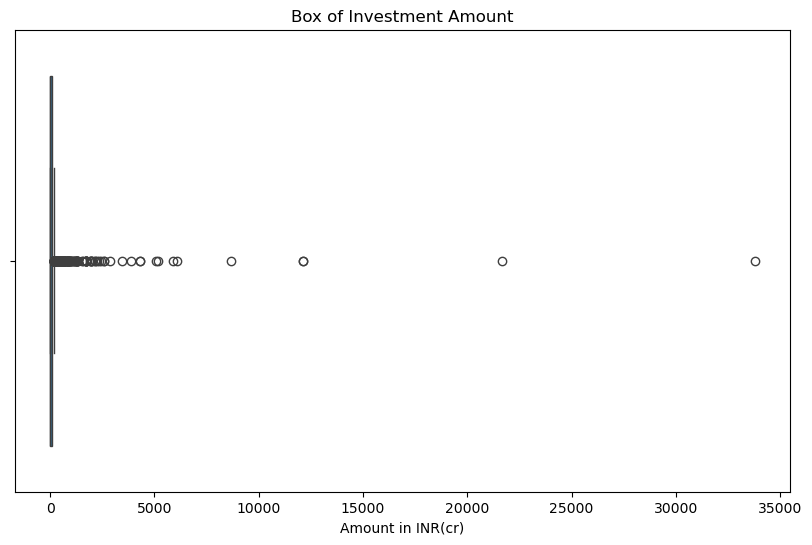

In [64]:
## Box plot
plt.figure(figsize =(10,6))
sns.boxplot(x=df['Amount in INR(cr)'])
plt.title('Box of Investment Amount')
plt.xlabel('Amount in INR(cr)')
plt.show()

##### Removing extreme outliers

In [65]:
Q1 = df['Amount in INR(cr)'].quantile(0.25)
Q3 = df['Amount in INR(cr)'].quantile(0.75)

IQR = Q3-Q1

In [66]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [67]:
df_clean = df[(df['Amount in INR(cr)']>=lower_bound) & (df['Amount in INR(cr)']<=upper_bound)]

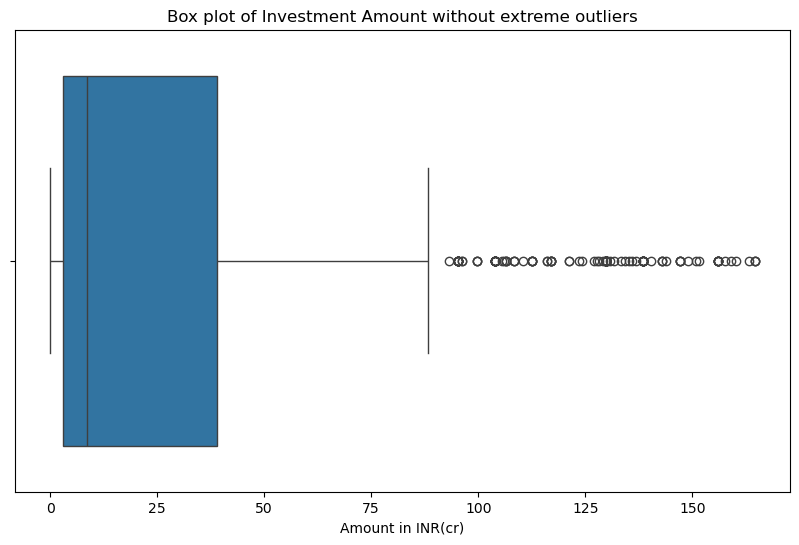

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['Amount in INR(cr)'])
plt.title('Box plot of Investment Amount without extreme outliers')
plt.xlabel('Amount in INR(cr)')
plt.show()

In [69]:
df['Vertical'] = df['Vertical'].replace(['ecommerce','Ecommerce','E-Commerce'],'E-commerce')
df['Vertical'] = df['Vertical'].str.replace('Ecommerce','E-commerce')

#### Total funding by Vertical

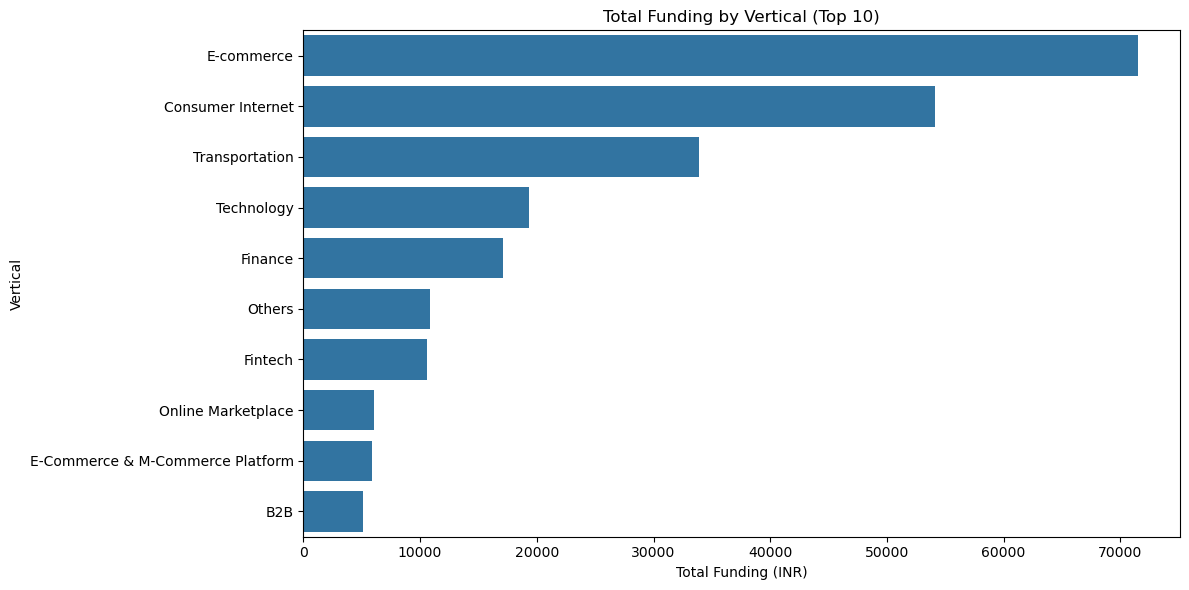

In [70]:

vertical_funding = df.groupby('Vertical')['Amount in INR(cr)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=vertical_funding.values, y=vertical_funding.index)
plt.title("Total Funding by Vertical (Top 10)")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Vertical")
plt.tight_layout()
plt.show()

#### Funding distribution across Investment Round

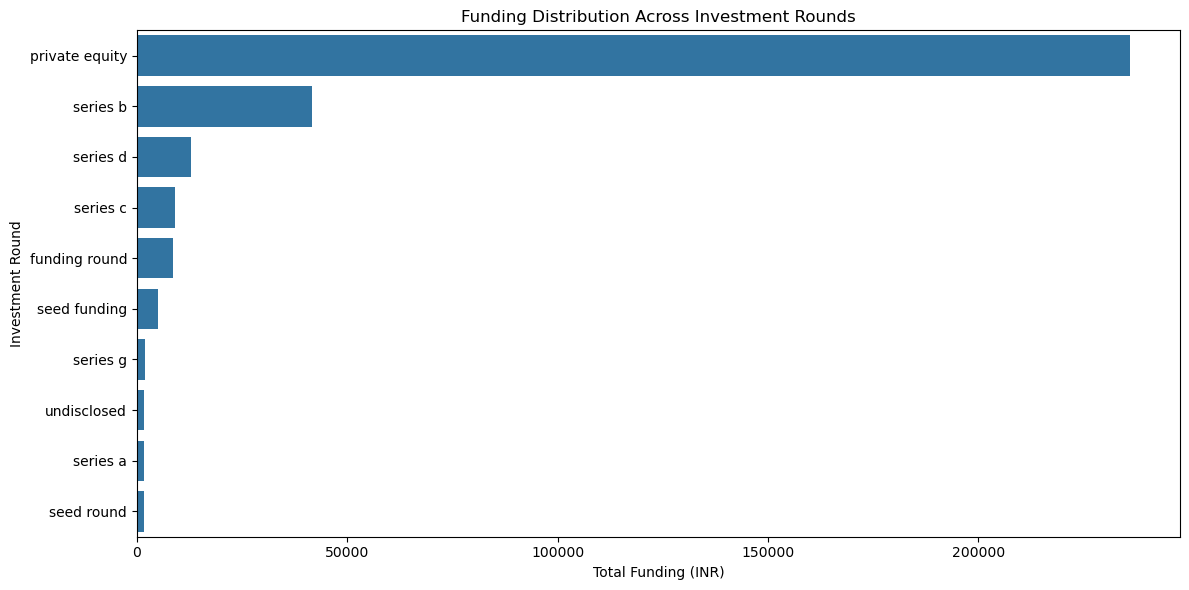

In [71]:
investment_round_funding = df.groupby('Investment Round')['Amount in INR(cr)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=investment_round_funding.values, y=investment_round_funding.index)
plt.title("Funding Distribution Across Investment Rounds")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Investment Round")
plt.tight_layout()
plt.show()

#### Investment Distribution by City

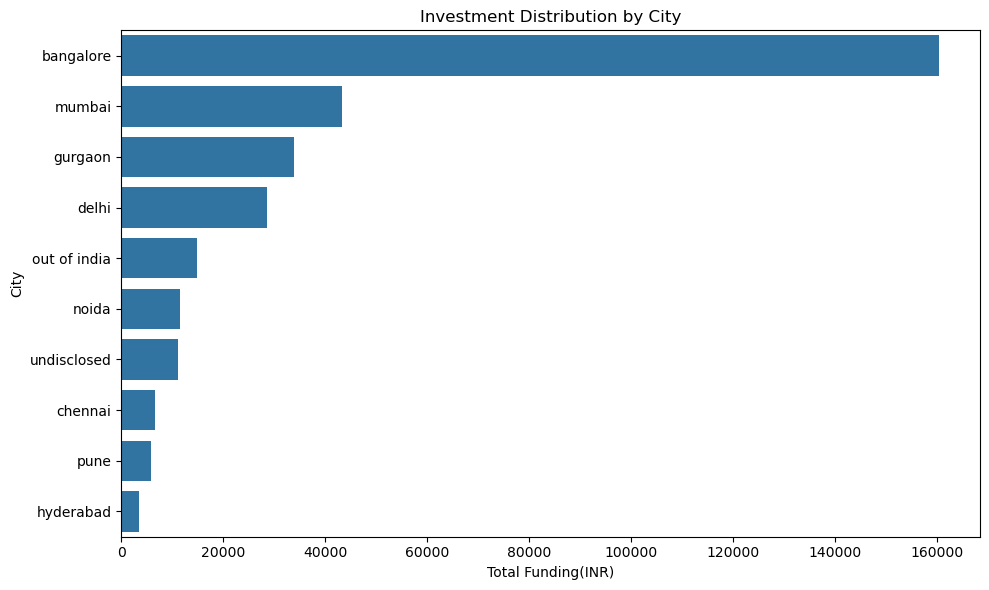

In [72]:
investment_by_city = df.groupby('City')['Amount in INR(cr)'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=investment_by_city.values , y= investment_by_city.index)
plt.title('Investment Distribution by City')
plt.xlabel("Total Funding(INR)")
plt.ylabel('City')
plt.tight_layout()
plt.show()

#### Identify startups with multiple funding rounds

In [73]:
multiple_funding_round = df['Startup'].value_counts().reset_index()
multiple_funding_round.columns = ['Startup','Funding_count']

In [74]:
multiple_funding_round = multiple_funding_round[multiple_funding_round['Funding_count']>1]

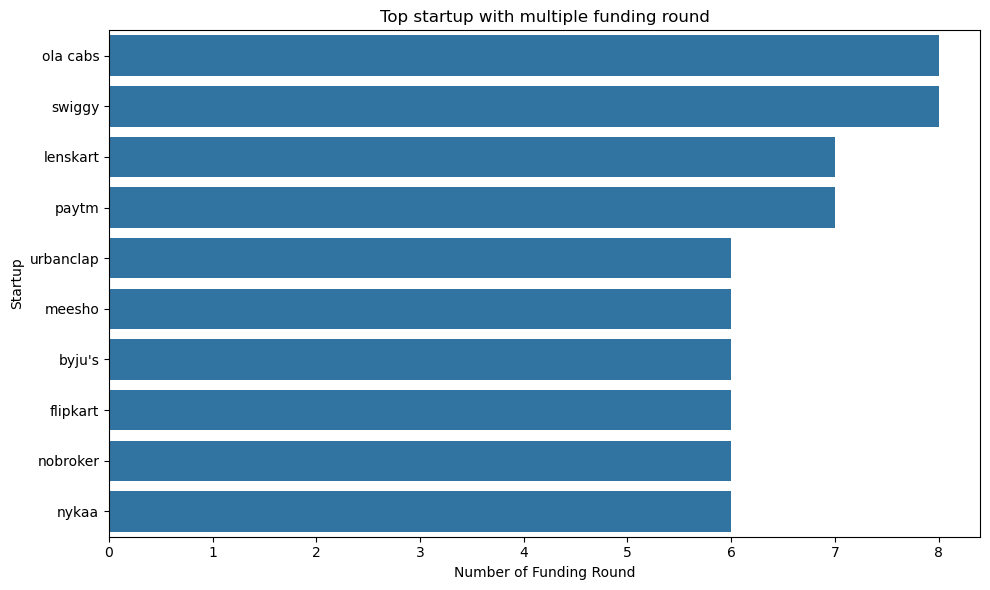

In [75]:
# Visualize the top 10 startups with multiple funding rounds
total_funding_round = multiple_funding_round.head(10)
plt.figure(figsize =(10,6))
sns.barplot(data = total_funding_round, x= 'Funding_count', y = 'Startup')
plt.title('Top startup with multiple funding round')
plt.xlabel('Number of Funding Round')
plt.ylabel('Startup')
plt.tight_layout()
plt.show()


In [77]:

df.to_csv('Cleaned Data.csv')